In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

C:\Users\ssahi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ssahi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\ssahi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
V1      = 100
V2      = 100
Rs1     = 0.01
Rs2     = 0.01
Cdc1    = 0.001
Cdc2    = 0.001
L1      = 0.01
L2      = 0.01
L3      = 0.01
Rl1     = 0.01
Rl2     = 0.01
Rl3     = 0.01
C1      = 0.00002
C2      = 0.00002
C3      = 0.00002
R1      = 5
R2      = 5
R3      = 5
fsw     = 100000
f       = 50


dt  = 1e-6
Tstop = 0.1
t = np.linspace(dt,Tstop,100000)

ncstep = 1/(fsw*dt)


Vcdc1 = np.zeros(len(t))
Vcdc2 = np.zeros(len(t))
Il1 = np.zeros(len(t))
Il2 = np.zeros(len(t))
Il3 = np.zeros(len(t))
Vc1 = np.zeros(len(t))
Vc2 = np.zeros(len(t))
Vc3 = np.zeros(len(t))

k = ncstep-1
for i in range(1,len(t)):

    
    k = k+1
    if k % ncstep == 0:
        
        d1 = 0.5+0.5*np.sin(2*np.pi*f*dt*i)
        d2 = 0.5+0.5*np.sin(2*np.pi*f*dt*i-2*np.pi/3)
        d3 = 0.5+0.5*np.sin(2*np.pi*f*dt*i+2*np.pi/3)
#         print('i = ',i)
#         print('k = ',k)
        
##        # These three lines were the problem... 
##        # You can simply run the script and look at the resulting plot now :)
##        d1 = 0.5;
##        d2 = 0.5;
##        d3 = 0.5;
                
        nTon1 = round(d1*ncstep)
        nTon2 = round(d2*ncstep)
        nTon3 = round(d3*ncstep)
        k = 0
    
    S1 = 0
    S2 = 0
    S3 = 0
    if k<=nTon1:
        S1 = 1
    
    if k<=nTon2:
        S2 = 1
    
    if k<=nTon3:
        S3 = 1
 
    
    S1 = d1;
    S2 = d2;
    S3 = d3;
    

    Vcdc1[i] = Vcdc1[i-1] + (dt/Cdc1) *- (S1*Il1[i-1]+S2*Il2[i-1]+S3*Il3[i-1]+Vcdc1[i-1]/Rs1-V1/Rs1)
    Vcdc2[i] = Vcdc2[i-1] + (dt/Cdc2) *- ((1-S1)*Il1[i-1]+(1-S2)*Il2[i-1]+(1-S3)*Il3[i-1]+Vcdc2[i-1]/Rs2+V2/Rs2)
    
    Il1[i]   = Il1[i-1] + (dt/L1) *- (Vc1[i-1]-Vcdc1[i-1]*S1-Vcdc2[i-1]*(1-S1)+Il1[i-1]*Rl1)
    Il2[i]   = Il2[i-1] + (dt/L2) *- (Vc2[i-1]-Vcdc1[i-1]*S2-Vcdc2[i-1]*(1-S2)+Il2[i-1]*Rl2)
    Il3[i]   = Il3[i-1] + (dt/L3) *- (Vc3[i-1]-Vcdc1[i-1]*S3-Vcdc2[i-1]*(1-S3)+Il3[i-1]*Rl3)
      
    
    Vc1[i]   = Vc1[i-1] + (dt/C1) *- (Vc1[i-1]/R1-Il1[i-1])
    Vc2[i]   = Vc2[i-1] + (dt/C2) *- (Vc2[i-1]/R2-Il2[i-1])
    Vc3[i]   = Vc3[i-1] + (dt/C3) *- (Vc3[i-1]/R3-Il3[i-1])
    
    


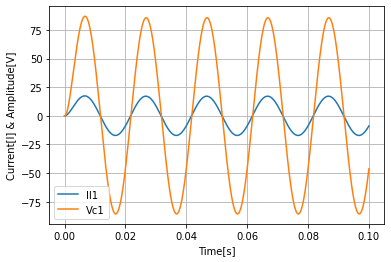

In [5]:
plt.figure(1)
plt.plot(t,Il1,t,Vc1)
plt.grid()
plt.xlabel('Time[s]')
plt.ylabel('Current[I] & Amplitude[V]')
plt.legend(['Il1','Vc1'])
plt.savefig('StateSpaceInverter_Serial')

# plt.figure(2)
# plt.plot(t,Vc1)
# plt.grid()
# plt.xlabel('Time[s]')
# plt.ylabel('Amplitude[V]')
# plt.legend(['Vc1','Vc2','Vc3'])

In [18]:
104 *-(41*3)

-12792